# Análisis de datos sobre el COVID-19 en México

Datos recolectados de: https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico8 (Consultado el 27/05/2020)

## Requisitos:
- Python versión >= 3.0
- numpy
- pandas
- matplotlib
- scipy

**NOTA:** El código se explica en forma de comentarios arriba del código correspondiente, ejemplo:
```python
# El siguiente código suma 3+7 y lo guarda en una variable 'a' y lo imprimimos
a = 3 + 7
print(a)
```
__Aunque si los comentarios son muy largos, se podrán poner en una celda aparte en formato texto, por ejemplo:__

El siguiente es un ejemplo de la alternativa para explicar el código, la siguiente celda suma 3 + 7

In [1]:
a = 3+7
print(a)

10


# Bien, empezamos a analizar nuestros datos

In [2]:
# Primero hay que importar todos nuestros requisitos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
from datetime import date
import scipy.stats as ss
from scipy import integrate
import statistics as stats

In [3]:
# Ahora, creamos nuestra variable "datos" que es donde se almacenarán nuestros datos en forma de 
# DataFrame de pandas
datos = pd.read_csv('datos_abiertos_covid19/200527COVID19MEXICO.csv')

In [4]:
# El siguiente código es para tener una visión completa de los datos
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

In [5]:
# Vemos las estructura que tienen los datos
datos.head()

,ID_REGISTRO,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI
0,1ba22b,3,25,2,25,2,23/04/2020,16/04/2020,27/04/2020,1,1,55,97,1,2,2,2,1,1,1,2,2,99,1,2
1,00b59f,3,27,2,27,2,24/04/2020,20/04/2020,9999-99-99,2,1,103,97,2,2,2,2,2,2,2,2,2,1,1,1
2,157def,4,2,2,26,2,08/04/2020,08/04/2020,9999-99-99,2,1,40,97,2,2,2,2,2,2,2,2,2,99,1,2
3,170aea,4,9,2,15,1,16/04/2020,08/04/2020,29/04/2020,97,2,70,97,1,2,2,2,1,2,2,2,1,99,1,97
4,01dea4,4,9,2,9,1,20/04/2020,07/04/2020,30/04/2020,97,2,36,97,2,2,2,2,2,2,1,2,2,99,1,97


Las columnas que tienen solo números, tienen su respectivo diccionario, es decir, qué significa cada cosa, 
por ejemplo, si hay un "2" en la columna de "sexo" entonces significa que es hombre, como abajo se indica.

In [6]:
# Diccionario de indicación simple, correspondiente a las columnas:
# "EMBARAZO", "DIABETES", "EPOC", "ASMA", "INMUSUPR",  "HIPERTENSION", "CARDIOVASCULAR", "OBESIDAD"
# "RENAL_CRONICA", "TABAQUISMO", "OTRO_CASO", "INTUBADO", "NEUMONIA"
si_no = {
        '1':'SI', 
        '2':'NO', 
        '97':'NO APLICA', 
        '98':'SE IGNORA', 
        '99':'NO ESPECIFICADO'}

# Diccionario que indica el sexo, correspondiente a la columna "SEXO"
sexo = {
        '1':'MUJER',
        '2':'HOMBRE',
        '99':'NO ESPECIFICADO'
        }

# Diccionario que indica el sector de cada paciente, Correspondiente a la columna "SECTOR"
sector = {
        '1': 'CRUZ ROJA',
        '2': 'DIF',
        '3': 'ESTATAL',
        '4': 'IMSS',
        '5': 'IMSS-BIENESTAR',
        '6': 'ISSSTE',
        '7': 'MUNICIPAL',
        '8': 'PEMEX',
        '9': 'PRIVADA',
        '10': 'SEDENA',
        '11': 'SEMAR',
        '12': 'SSA',
        '13': 'UNIVERSITARIO',
        '99': 'NO ESPECIFICADO'
        }
# Diccionario que indica el estado de cada paciente, correspondiente a la columna "TIPO_PACIENTE"
paciente = {
        '1':'AMBULATORIO',
        '2':'HOSPITALIZADO',
        '99':'NO ESPECIFICADO'
        }
# Diccionario que indica el resultado del paciente, correspondiente a la columna "RESULTADO"
resultado = {
        '1':'Positivo SARS-CoV-2',
        '2':'No positivo SARS-CoV-2',
        '3':'Resultado pendiente'
        }

# Diccionario que indica la ubicación del paciente, correspondiente a la columna "ENTIDAD_RES"
entidades = {
        '01': 'AGUASCALIENTES',
        '02': 'BAJA CALIFORNIA',
        '03': 'BAJA CALIFORNIA SUR',
        '04': 'CAMPECHE',
        '05': 'COAHUILA DE ZARAGOZA',
        '06': 'COLIMA',
        '07': 'CHIAPAS',
        '08': 'CHIHUAHUA',
        '09': 'CIUDAD DE MÉXICO',
        '10': 'DURANGO',
        '11': 'GUANAJUATO',
        '12': 'GUERRERO',
        '13': 'HIDALGO',
        '14': 'JALISCO',
        '15': 'MÉXICO',
        '16': 'MICHOACÁN DE OCAMPO',
        '17': 'MORELOS',
        '18': 'NAYARIT',
        '19': 'NUEVO LEÓN',
        '20': 'OAXACA',
        '21': 'PUEBLA',
        '22': 'QUERÉTARO',
        '23': 'QUINTANA ROO',
        '24': 'SAN LUIS POTOSÍ',
        '25': 'SINALOA',
        '26': 'SONORA',
        '27': 'TABASCO',
        '28': 'TAMAULIPAS',
        '29': 'TLAXCALA',
        '30': 'VERACRUZ DE IGNACIO DE LA LLAVE',
        '31': 'YUCATÁN',
        '32': 'ZACATECAS',
        '36': 'ESTADOS UNIDOS MEXICANOS',
        '97': 'NO APLICA',
        '98': 'SE IGNORA',
        '99': 'NO ESPECIFICADO'
}

Ahora creo un diccionario de que cátalogo le corresponde cada columna del dataframe:

In [7]:
# Ahora, creamos un diccionario que nos permita relacionar cada columna con su respectivo catálogo, 
# mostrado y especificado anteriormente
columna = {
        'SECTOR': sector,                                                            
        'ENTIDAD_UM': entidades,
        'SEXO': sexo,                    
        'ENTIDAD_RES': entidades,
        'TIPO_PACIENTE': paciente,
        'RESULTADO': resultado,
        'INTUBADO':si_no,	                                                             
        'NEUMONIA':si_no,                                                          
        'EMBARAZO':si_no,	                                                              
        'DIABETES':si_no,	                                                                
        'EPOC':si_no,                                                           
        'ASMA':si_no,                                                               
        'INMUSUPR':si_no,	                                                                
        'HIPERTENSION':si_no,                                                                 
        'CARDIOVASCULAR':si_no,	                                                                 
        'OBESIDAD':si_no,                                                                  
        'RENAL_CRONICA':si_no,                                                       
        'TABAQUISMO':si_no,	                                                            
        'OTRO_CASO':si_no,	                                                                       
        'UCI':si_no                                                                  
}

In [8]:
# Dos ejemplos de las consulta de este último catálogo es la siguiente
print(columna['SEXO']['2'])

print(columna['ENTIDAD_RES']['05'])

HOMBRE
COAHUILA DE ZARAGOZA


# Probabilidad de muerte y hospitalización dada una complicación de salud previa

En este caso calcularemos la probabilidad de morir dado que se tiene cierta complicación de salud. (**Ojo:** Toda la muestra de análisis está confirmada con Coronavirus). 

In [9]:
# Sólo nos interesan los casos positivos, por ende, los filtramos a una variable llamada "enfermos" 
enfermos = datos[datos['RESULTADO'] == 1]
# Verificamos que tenga las columnas correspondientes y todo marche bien
enfermos.columns

Index(['ID_REGISTRO', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_RES',
       'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF',
       'INTUBADO', 'NEUMONIA', 'EDAD', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO', 'UCI'],
      dtype='object')

**NOTA**: Los pacientes que no tienen fecha de defunción están marcados en la columna 'FECHA_DEF' con el número '9999-99-99', usaremos esto para calcular las muertes totales

In [10]:
# Obtenemos la probabilidad general de muertes
enfermos_totales = len(enfermos) # Número de enfermos
muertos_totales = len(enfermos[enfermos['FECHA_DEF'] != '9999-99-99']) # Número de defunciones
hospitalizados_totales = len(enfermos[enfermos['TIPO_PACIENTE'] == 2]) # Número de hospitalizados

p_general_muerte = muertos_totales/enfermos_totales # Probabilidad general de muerte (Sin considerar otras complicaciones)
p_general_hosp = hospitalizados_totales/enfermos_totales # Probailidad de ser hospitazado
print(f"Probabilidad de muerte general: P(MG) = {p_general_muerte}")
print(f"Probabilidad de hospitalización general: P(HG) = {p_general_hosp}")

Probabilidad de muerte general: P(MG) = 0.11018545813413994
Probabilidad de hospitalización general: P(HG) = 0.3620470886789793


In [11]:
# El siguiente código calcula la probabilidad de muerte de una persona sin complicaciones de salud
# Sólo CORONAVIRUS
complicaciones = enfermos.columns[12:22]   # Arreglo lleno de los nombres de las complicaciones

sin_comp = datos[datos['RESULTADO'] == 1]  # Filtramos solo confirmados con COVID

# Recorremos cada complicación y nos aseguramos de que filtrar todas las que tienen número 2, es decir, "NO".
for i, complicacion in enumerate(complicaciones):
    sin_comp = sin_comp[sin_comp[complicacion] == 2]
    
# Obtenemos el tamaño del arreglo, los hospitalizados sólo con Coronavirus y los muertos sólo por coronavirus
n_sin_comp = len(sin_comp)
hosp_sin_comp = len(sin_comp[sin_comp['TIPO_PACIENTE'] == 2])
muertos_sin_comp = len(sin_comp[sin_comp['FECHA_DEF'] != '9999-99-99'])

# Obtenemos la probabilidad de: 
p_sano_muerte = muertos_sin_comp/n_sin_comp # Muerto sólo por coronavirus
p_sano_hosp = hosp_sin_comp/n_sin_comp # Hospitalizado sólo por coronavirus

# Imprimimos resultados
print(f"Probabilidad de muerte sólo por coronavirus: P(MC) = {p_sano_muerte}")
print(f"Probabilidad de hospitalizado sólo por coronavirus: P(HC) = {p_sano_hosp}")

Probabilidad de muerte sólo por coronavirus: P(MC) = 0.03169263456090651
Probabilidad de hospitalizado sólo por coronavirus: P(HC) = 0.18047686496694995


In [12]:
# Obtenemos los diferentes datos para cada tipo de complicación de salud

p_muerte_comp = [] #Aqui guardaremos los datos

for i, complicacion in enumerate(complicaciones):
    p_muerte_comp.append([])
    p_muerte_comp[i].append(complicacion)  # Agregamos el nombre de la complicacion
    
    # El siguiente arreglo guarda todos aquellos casos que tengan cada complicación
    casos = enfermos[enfermos[complicacion] == 1]
    n_casos = len(casos)   # El tamaño del arreglo
    p_muerte_comp[i].append(n_casos)  # Número de casos con esa complicación
    
    n_hospitalizado = len(casos[casos['TIPO_PACIENTE'] == 2])
    p_muerte_comp[i].append(n_hospitalizado)  #Número de personas hospitalizadas con esa complicación
    
    muertos = casos[casos['FECHA_DEF'] != '9999-99-99']
    n_muertos = len(muertos)
    p_muerte_comp[i].append(n_muertos)  #Número de muertos con esa complicacion de salud
    
    probabilidad_muerte = n_muertos/n_casos   # Probabilidad de muerte por condición
    p_muerte_comp[i].append(probabilidad_muerte)
    
    probabilidad_h = n_hospitalizado/n_casos
    p_muerte_comp[i].append(probabilidad_h)   # Probabilidad condicional de hospitalización
    
p_muerte_comp.append(['GENERAL', enfermos_totales, hospitalizados_totales, 
                      muertos_totales, p_general_muerte, p_general_hosp])  # Añadimos el general nacional
p_muerte_comp.append(['SANOS', n_sin_comp, hosp_sin_comp,
                      muertos_sin_comp, p_sano_muerte, p_sano_hosp])   # Añadimos el caso sin complicaciones

# Creamos nuestro dataFrame para visualizar mejor los datos
p_muerte_comp = pd.DataFrame(p_muerte_comp, columns = ['Complicación', 'Casos',  'Hospitalizados',
                                                       'Defunciones', 'Probabilidad muerte', 
                                                       'Probabilidad hospitalizacion']).sort_values(by="Probabilidad muerte")
p_muerte_comp

,Complicación,Casos,Hospitalizados,Defunciones,Probabilidad muerte,Probabilidad hospitalizacion
0,EMBARAZO,486,152,13,0.026749,0.312757
11,SANOS,16944,3058,537,0.031693,0.180477
3,ASMA,2290,669,196,0.085590,0.292140
10,GENERAL,78023,28248,8597,0.110185,0.362047
9,TABAQUISMO,6470,2444,812,0.125502,0.377743
7,OBESIDAD,16053,6784,2306,0.143649,0.422600
4,INMUSUPR,1216,730,262,0.215461,0.600329
5,HIPERTENSION,16444,9297,3583,0.217891,0.565373
1,DIABETES,13854,8579,3223,0.232640,0.619244
6,CARDIOVASCULAR,2056,1175,487,0.236868,0.571498


### Graficamos probabilidad de muerte

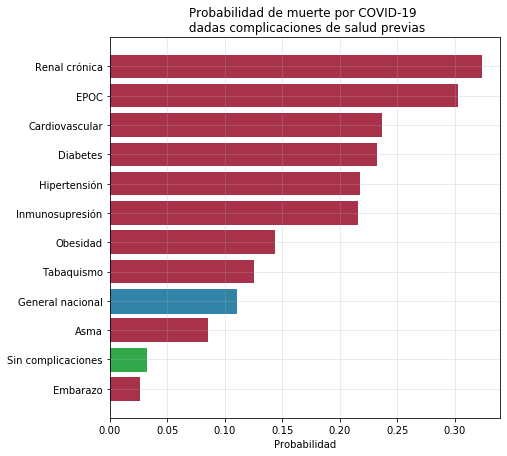

In [13]:
# El siguiente código grafica la probabilidad de muerte frente a las complicaciones

ordenados = p_muerte_comp.sort_values(by='Probabilidad muerte') #Ordenamos de acuerdo a la probabilidad
# Creamos nuestra lista de complicaciones
index = ordenados['Complicación']
# Creamos nuestros labels para las gráficas
labels = ['Renal crónica', 'EPOC', 'Cardiovascular', 'Diabetes', 
          'Hipertensión', 'Inmunosupresión', 'Obesidad', 'Tabaquismo', 
          'General nacional', 'Asma', 'Sin complicaciones', 'Embarazo']
# Creamos una lista con las probabilidades y números consecutivos
y = ordenados['Probabilidad muerte']
x = [i for i in range(len(index))]

# Creamos nuestro objeto fig y aux que nos permiten realizar la gráfica gracias a matplotlib
fig, ax = plt.subplots(figsize = (7,7))
# Graficamos y escogemos el color
grafica = ax.barh(x, y, color = '#a8324a')
# Cambiamos el color de las celdas "Sin complicaciones" y "General Nacional" para resaltarlas
grafica[1].set_color('#32a84c')
grafica[3].set_color('#3283a8')
# Hacemos la cuadrícula visible
ax.grid(alpha = 0.3)
# Añadimos título
ax.set_title('Probabilidad de muerte por COVID-19 \n dadas complicaciones de salud previas')
# Asignamos los labels o nombre de cada barra
plt.yticks([11, 10, 9, 8,7,6,5,4,3,2,1,0])
ax.set_yticklabels(labels)
ax.set_xlabel('Probabilidad')
# Mostramos gráfica
plt.show()

### Graficamos probabiliada de hospitalización

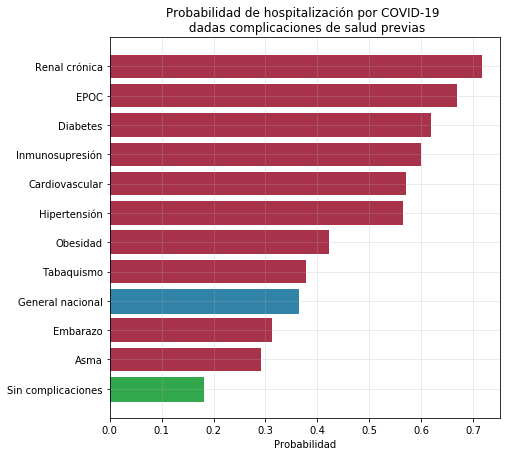

In [14]:
# Lo anterior es casi exactamente lo mismo que antes, pero ahora con el caso de hospitalización.
ordenados = p_muerte_comp.sort_values(by='Probabilidad hospitalizacion') #Ordenamos de acuerdo a la probabilidad
# Creamos nuestra lista de complicaciones
index = ordenados['Complicación']
# Creamos nuestros labels para las gráficas
labels = ['Renal crónica', 'EPOC', 'Diabetes', 'Inmunosupresión', 'Cardiovascular',  
          'Hipertensión',  'Obesidad', 'Tabaquismo', 
          'General nacional', 'Embarazo', 'Asma', 'Sin complicaciones']

# Creamos una lista con las probabilidades y números consecutivos
y = ordenados['Probabilidad hospitalizacion']
x = [i for i in range(len(index))]

# Creamos nuestro objeto fig y aux que nos permiten realizar la gráfica gracias a matplotlib
fig, ax = plt.subplots(figsize = (7,7))

# Graficamos y escogemos el color
grafica = ax.barh(x, y, color = '#a8324a')

# Cambiamos el color de las celdas "Sin complicaciones" y "General Nacional" para resaltarlas
grafica[0].set_color('#32a84c')
grafica[3].set_color('#3283a8')

# Hacemos la cuadrícula visible
ax.grid(alpha = 0.3)

# Añadimos título
ax.set_title('Probabilidad de hospitalización por COVID-19 \n dadas complicaciones de salud previas')

# Añadimos labels
plt.yticks([11, 10, 9, 8,7,6,5,4,3,2,1,0])
ax.set_yticklabels(labels)
ax.set_xlabel('Probabilidad')

# Mostramos gráfica
plt.show()

# Tipo de paciente por grupo de edad

En esta sección del código separaremos cada paciente en un grupo de edad, los grupos de edad serán de 10 años

In [15]:
data = datos.copy()  # Creamos copia de los datos

bins = [x*10 for x in range(11)]  # Creamos los limites de los grupos

edad = []

for i in range(10):
    # Creamos array booleano selector
    menores = data['EDAD'] < bins[i+1]
    mayores = data['EDAD'] >= bins[i]
    tomar = []
    for j in range(len(data)):
        tomar.append(menores[j] and mayores[j])
        
    # Agregamos los resultados filtrados a "edad"
    edad.append([])
    edad[i].append(f'{bins[i]}-{bins[i+1]-1}')
    edad[i].append(data[tomar])

In [16]:
# Esto es un ejemplo de como se ve edad:
print('Grupo de edad:', edad[6][0])
edad[6][1].head()

Grupo de edad: 60-69


,ID_REGISTRO,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI
5,0fcdb4,4,15,2,15,2,21/04/2020,13/04/2020,9999-99-99,2,2,60,97,2,2,2,2,2,2,2,2,2,99,1,2
9,167559,4,9,2,9,1,18/04/2020,17/04/2020,9999-99-99,97,1,62,97,1,2,2,2,1,2,2,2,1,99,1,97
16,71944,4,14,2,14,2,04/05/2020,04/05/2020,9999-99-99,2,2,62,97,2,2,2,2,1,2,2,2,2,99,1,2
19,02a928,4,7,2,7,2,07/04/2020,07/04/2020,9999-99-99,2,2,61,97,2,2,2,2,2,2,1,2,2,99,1,2
20,15553,4,2,2,2,2,09/04/2020,04/04/2020,9999-99-99,2,1,64,97,2,2,2,2,1,2,2,2,2,99,1,2


Separamos cada grupo de edad por tipo de paciente: ambulatorio u hospitalizado:

In [17]:
casos_edad = [] # Arreglo vacío que usaremos después

for i in range(10):
    # Obtenemos el tamaño de cada sección de edad
    totales = len(edad[i][1])
    # Obtenemos el número de pacientes que están en estado ambulatorio
    ambulatorio = len(edad[i][1][edad[i][1]['TIPO_PACIENTE'] == 1])
    # Obtenemos el número de pacientes que están en estado hospitalizado
    hospitalizado = len(edad[i][1][edad[i][1]['TIPO_PACIENTE'] == 2])
    
    muertos = len(edad[i][1][edad[i][1]['FECHA_DEF']  != '9999-99-99'])
    p_muerte = muertos/totales
    p_hosp = hospitalizado/totales
    
    casos_edad.append([edad[i][0], totales, ambulatorio, hospitalizado, muertos, p_muerte, p_hosp])
    
grupo_edad = pd.DataFrame(casos_edad, columns = ['Grupo de edad', 'Casos totales', 'Ambulatorios',
                                                 'Hospitalizados', 'Fallecidos', 'Probabilidad de muerte',
                                                'Probabilidad de hospitalización'])

grupo_edad

,Grupo de edad,Casos totales,Ambulatorios,Hospitalizados,Fallecidos,Probabilidad de muerte,Probabilidad de hospitalización
0,0-9,6804,4153,2651,137,0.020135,0.389624
1,10-19,7447,6342,1105,65,0.008728,0.148382
2,20-29,38783,35294,3489,241,0.006214,0.089962
3,30-39,59608,52837,6771,720,0.012079,0.113592
4,40-49,53918,43360,10558,1804,0.033458,0.195816
5,50-59,39670,26883,12787,3009,0.075851,0.322334
6,60-69,21688,10869,10819,3096,0.142752,0.498847
7,70-79,10965,4101,6864,2142,0.195349,0.625992
8,80-89,4886,1674,3212,1068,0.218584,0.657388
9,90-99,1026,409,617,189,0.184211,0.601365


### Graficamos tipo de paciente por edad (histograma):

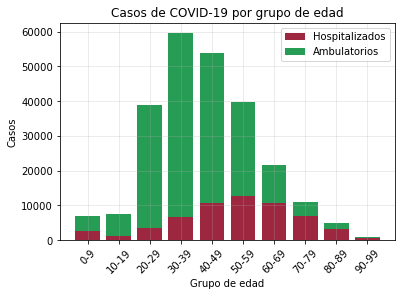

In [18]:
# Creamos los labels o nombres de cada sección
labels = [f'{x*10}-{(x+1)*10-1}' for x in range(10)]
# Creamos nuestros histogramas, de hospitalizados y Ambulatorios
plt.bar(labels, list(grupo_edad['Hospitalizados']), label = 'Hospitalizados', color = '#9c273f')
plt.bar(labels, list(grupo_edad['Ambulatorios']), label = 
        'Ambulatorios', bottom = list(grupo_edad['Hospitalizados']), color = '#279c54')
# Le agregamos los nombres y el título además de que le damos formato
plt.legend()
plt.xlabel('Grupo de edad')
plt.ylabel('Casos')
plt.xticks(rotation = 45)
plt.title('Casos de COVID-19 por grupo de edad')
plt.grid(alpha = 0.3)
plt.show()

### Graficamos las muertes registradas por edad 

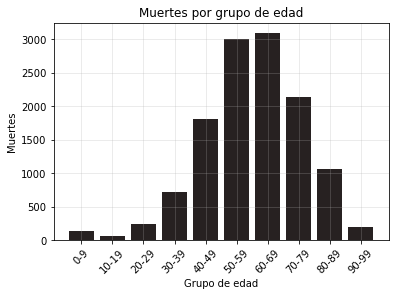

In [19]:
# Creamos nuestros intervalos como antes
labels = [f'{x*10}-{(x+1)*10-1}' for x in range(10)]
# Obtenemos nuestros datos
y = grupo_edad['Fallecidos']
# Graficamos
plt.bar(labels, y, color = '#272121')
# Le damos formato como anteriormente se menciona
plt.xlabel('Grupo de edad')
plt.ylabel('Muertes')
plt.xticks(rotation = 45)
plt.title('Muertes por grupo de edad')
plt.grid(alpha = 0.3)
plt.show()

### Graficamos la probabilidad de hospitalización o muerte por edad

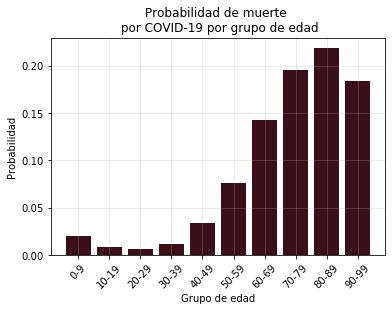

In [20]:
# Creamos nuestros intervalos como antes
labels = [f'{x*10}-{(x+1)*10-1}' for x in range(10)]
# Obtenemos nuestros datos
y = grupo_edad['Probabilidad de muerte']
# Graficamos
plt.bar(labels, y, color = '#3b0f1a')
# Le damos formato como anteriormente se menciona
plt.xlabel('Grupo de edad')
plt.ylabel('Probabilidad')
plt.xticks(rotation = 45)
plt.title('Probabilidad de muerte \n por COVID-19 por grupo de edad')
plt.grid(alpha = 0.3)
plt.show()

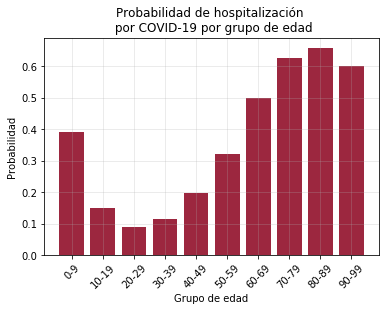

In [21]:
# Este código es lo mismo que el anterior pero aquí graficamos la probabilidad de hospitalización
labels = [f'{x*10}-{(x+1)*10-1}' for x in range(10)]

y = grupo_edad['Probabilidad de hospitalización']

plt.bar(labels, y, color = '#9c273f')

plt.xlabel('Grupo de edad')
plt.ylabel('Probabilidad')
plt.xticks(rotation = 45)
plt.title('Probabilidad de hospitalización \n por COVID-19 por grupo de edad')
plt.grid(alpha = 0.3, )
plt.show()

## Analisis de la evolución de la enfermedad

### General

In [22]:
# Veamos la cantidad total de muertes
muertos = datos[datos['FECHA_DEF'] != '9999-99-99']
print(len(muertos)) # Imprimimos

12477


In [63]:
# Obtenemos la fecha cuando empiezan los síntomas y las fechas de muerte
sintomas = list(muertos['FECHA_SINTOMAS'])
muerte = list(muertos['FECHA_DEF'])

# Lo convertimos en un objeto reconocible por Python
dias = []
for i in range(len(sintomas)):
    aux = sintomas[i].split('/')
    a = date(int(aux[2]), int(aux[1]), int(aux[0]))
    aux = muerte[i].split('/')
    b = date(int(aux[2]), int(aux[1]), int(aux[0]))
    delta = b-a
    if(40>=delta.days>=0):
        dias.append(int(delta.days)+1)
# Obtenemos una lista de los días que tardó cada persona en fallecer

In [65]:
# Obtendremos su promedio y su desviación estándar (De los días en que las personas que fallecieron)
mean = np.average(dias)
std = np.std(dias)

print(f'Tiempo promedio de fallecimiento: {mean:.3f}')
print(f"Desviación estándar del tiempo: {std}")

Tiempo promedio de fallecimiento: 11.028
Desviación estándar del tiempo: 6.482110255862074


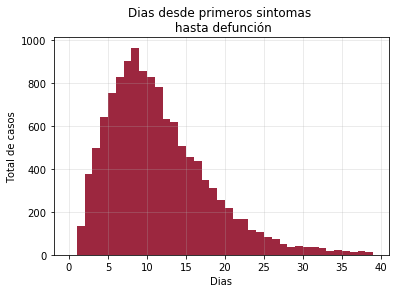

In [66]:
# Grafiquemos la lista de días antes mencionados
a = plt.hist(dias, bins = [x for x in range(40)], color = '#9c273f')
plt.xlabel('Dias')
plt.ylabel('Total de casos')
plt.grid(alpha = 0.3)
plt.title('Dias desde primeros sintomas \n hasta defunción')
plt.show()

### Ajuste de distribución de probabilidad

In [67]:
# Hagamos un ajuste de distribución que nos proporcione información sobre los datos
# Primero, sacamos todas las frecuencias de nuestra gráfica anterior
frecuencias = a[0]
totales = sum(frecuencias) # Sumamos las frecuencuas para tener un total
# Obtenemos la probabilidad que tiene cada día 
probabilidad = frecuencias/totales

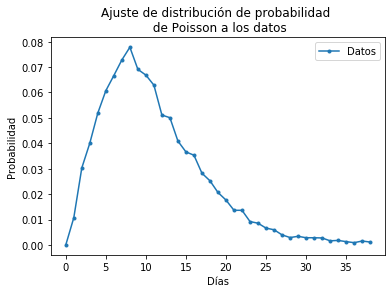

In [68]:
# Graficamos estas probabilidades
x = [x for x in range(len(probabilidad))]
plt.plot(x, probabilidad, marker = '.', label = 'Datos')
plt.legend()
plt.ylabel('Probabilidad')
plt.xlabel('Días')
plt.title('Ajuste de distribución de probabilidad \n de Poisson a los datos')
plt.show()

**Tomaremos como variable aleatoria los días que pasan desde el inicio de la fecha de síntomas hasta la muerte de una persona coon Coronavirus registrada en México, lo que nos da lo siguiente y trataremos de hacer ajustes con distintas distribuciones de probabilidad**

# Ajuste normal:

In [69]:
# Creamos nuestro modelo que será una función normal
def funcionNormal(x, mean, std):
    """
    Descripción: Regresa los valores que tomaría una distribución normal.
    IN ={
        mean: La media de los datos a que deseamos
        std: La desviación estándar de los datos
        x1: El dato x que estamos graficando en el momento
    }
    OUT: Los valores para una distribución normal
    """
    # Fórmula de nuestra función normal
    return 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2) )

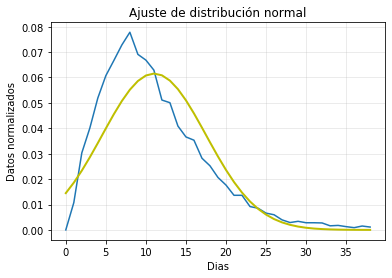

In [71]:
# Grafiquemos la lista de días antes mencionados
# Establecemos nuestras x
x = [x for x in range(len(probabilidad))]
# Graficamos nuestros datos anteriores
plt.plot(x, probabilidad, label = 'Datos')
# Colocamos nuestro modelo para hacer la comparación
plt.plot(x, funcionNormal(mean=mean, std=std, x=x), linewidth=2, color='y', label="Modelo Normal")
# Le damos formato a la gráfica
plt.xlabel('Dias')
plt.ylabel('Datos normalizados')
plt.grid(alpha = 0.3)
plt.title('Ajuste de distribución normal')
plt.show()

**Note que el fenómeno no parece seguir el comportamiento normal, probaremos con otra distribución, pero primero, una optimización de los parámetros de la distribución con scipy (Librería de Python)**

## Haremos una optimización con scipy

In [72]:
newMean, newStd = ss.norm.fit(dias)
print(f"La nueva media es: {newMean}")
print(f"La nueva desviación estándar es: {newStd}")

La nueva media es: 11.027876248791491
La nueva desviación estándar es: 6.482110255862074


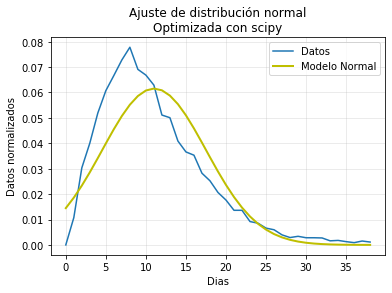

In [73]:
# Graficamos nuestros datos anteriores
plt.plot(x, probabilidad, label = 'Datos')
# Colocamos nuestro modelo para hacer la comparación
plt.plot(x, funcionNormal(mean=newMean, std=newStd, x=x), linewidth=2, color='y', label="Modelo Normal")
# Le damos formato a la gráfica
plt.xlabel('Dias')
plt.legend()
plt.ylabel('Datos normalizados')
plt.grid(alpha = 0.3)
plt.title('Ajuste de distribución normal\nOptimizada con scipy')
plt.show()

**Note que no hay ningún cambio considerable**

Una alternativa podría ser normalizar la curva, para ello evaluamos la siguiente integral.

In [74]:
I1 = integrate.quad(funcionNormal, 0, np.inf, args=(newMean, newStd))
print(f"El valor aproximado de nuestra integral es: {I1[0]}")
print(f"El error de nuestra intergal es: {I1[1]}")

El valor aproximado de nuestra integral es: 0.9555546691668142
El error de nuestra intergal es: 5.469022628830196e-09


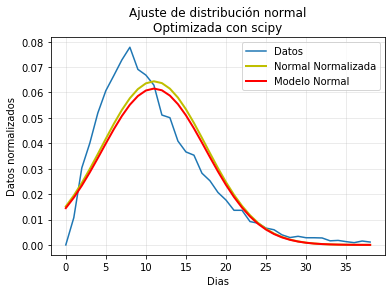

In [75]:
# Hacemos la gráficación pero ahora con la curva normalizada:
# Graficamos nuestros datos anteriores
plt.plot(x, probabilidad, label = 'Datos')
# Colocamos nuestro modelo para hacer la comparación y nuestro modelo normalizado para ver qué onda
plt.plot(x, funcionNormal(mean=newMean, std=newStd, x=x)/I1[0], linewidth=2, color='y', label="Normal Normalizada")
plt.plot(x, funcionNormal(mean=newMean, std=newStd, x=x), linewidth=2, color='r', label="Modelo Normal")
# Le damos formato a la gráfica
plt.xlabel('Dias')
plt.legend()
plt.ylabel('Datos normalizados')
plt.grid(alpha = 0.3)
plt.title('Ajuste de distribución normal\nOptimizada con scipy')
plt.show()

**Sigue sin haber mucha diferencia la verdad, creo que intentaremos con otro modelo**

# Distribución Lognormal

In [80]:
# Primero, ajustamos los parámetros a nuestros datos
scatter,loc,mean = ss.lognorm.fit(dias)
# Imprimimos nuestros parámetros
print("scatter for data is %s" %scatter)
print("loc for data is %s" %loc)
print("mean of data is %s" %mean)  

scatter for data is 0.4368505157686289
loc for data is -3.510003329906294
mean of data is 13.229438288718214


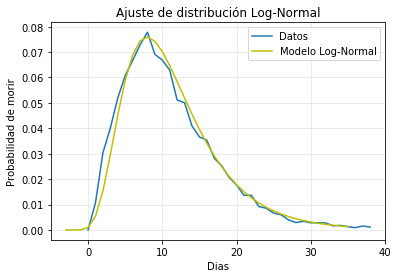

In [77]:
# Creamos nuestra gráfica de los datos
plt.plot(x, probabilidad, label = 'Datos')
# Creamos nuestra función de densidad de probabilidad
pdf = ss.lognorm.pdf(x=x, s=scatter, scale=mean)
# Imprimimos nuestra función
plt.plot(np.array(x)-3, pdf, 'k', c="y", label="Modelo Log-Normal")
# Le damos formato
plt.xlabel('Dias')
plt.ylabel('Probabilidad de morir')
plt.grid(alpha = 0.3)
plt.title('Ajuste de distribución Log-Normal')
plt.legend()
plt.show()

# Graficas juntas

Ahora, a continuación, graficaremos todas las curvas que obtuvimos para comparar

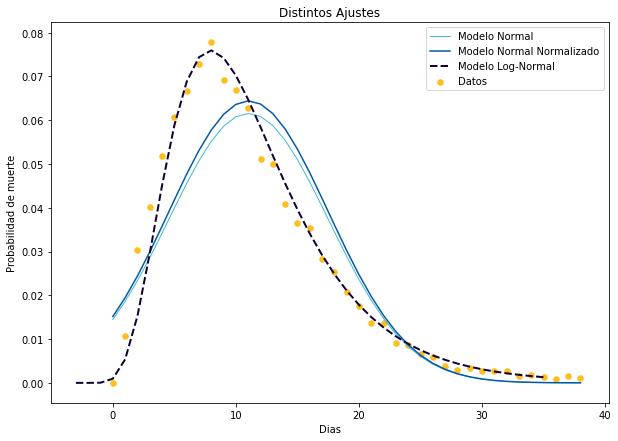

In [78]:
fig, ax = plt.subplots(figsize = (10, 7))
# Graficamos la función normal
ax.plot(x, funcionNormal(mean=newMean, std=newStd, x=x), linewidth=1, color='#40bad5', label="Modelo Normal")
# Ahora la versión normalizada
ax.plot(x, funcionNormal(mean=newMean, std=newStd, x=x)/I1[0], linewidth=1.5, color='#035aa6', label="Modelo Normal Normalizado")
# Ahora nuestra versión log-normal
ax.plot(np.array(x)-3, pdf, '--', c="#120136", label="Modelo Log-Normal", linewidth=2)
# Graficamos nuestros datos
ax.scatter(x, probabilidad, label = 'Datos', c="#fcbf1e", s=30)
# Le damos formato a la gráfica
plt.xlabel('Dias')
plt.legend()
plt.ylabel('Probabilidad de muerte')
#plt.grid(alpha = 0.3)
plt.title('Distintos Ajustes')
plt.show()

## Inferencia estadística

Queremos probar que las personas que fallecen de COVID-19 mueren en un periodo menor a 10 dias. 

In [37]:
#La media de los dias que las peronas tardan en morir es la siguiente:
Mu = stats.mean(dias)
Mu

11.027876248791491

In [38]:
#La desviación estándar de la población es:
Sig = stats.pstdev(dias)
Sig

6.482110255862074

Por lo que establecemos nuestras hipótesis como:

Hipótesis nula $H_0: \mu = 10$

Hipótesis alternativa $H_1: \mu < 10$

Vamos a utilizar como distribución de probabilidad el ajuste normal, y el ajuste log

In [39]:
#Tomamos una muestra aleatoria de 100 personas
muestra = np.random.choice(dias, 100, replace=False)

In [40]:
print('La media de la muestra es: ' + str(stats.mean(muestra)))

La media de la muestra es: 11


Calculamos nuestra $\alpha$ con la distribución de probabilidad normal

$\alpha$ = P (z < k) $\Rightarrow$ k = $\frac{10-10}{6.48/10}$ = 0 $\Rightarrow$ P (z < 0) = 0.5

El nivel de significancia es demasiado alto, por lo que no podemos rechazar nuestra hipótesis nula de que la media es igual a 10.

Uilizando ahora la distribución LogNormal, integramos los valores de la distribución para los valores mayores a la media de la muestra

In [41]:
prob = 0
for i in range(len(pdf)):
    if x[i] >= 10:
        prob = pdf[i] + prob

In [42]:
print('El nivel de significancia es: ' + str(prob))

El nivel de significancia es: 0.7687915017036069


Nuevamente es demasiado alto, por lo que de igual manera no podemos rechazar la hipótesis nula. Podemos plantear una nueva hipótesis para un mejor análisis.

Hipótesis nula $H_0: \mu = 15$

Hipótesis alternativa $H_1: \mu < 15$

Ahora planteamos una hipótesis en la que queremos ver que pasa con 15 dias

In [43]:
#Tomamos una nueva muestra aleatoria de 100 personas
muestra2 = np.random.choice(dias, 100, replace=False)

In [44]:
print('La media de la muestra es: ' + str(stats.mean(muestra2)))

La media de la muestra es: 10


Calculamos nuestra $\alpha$ con la distribución de probabilidad normal

$\alpha$ = P (z < k) $\Rightarrow$ k = $\frac{10-15}{6.48/10}$ = -7.71 $\Rightarrow$ P (z < -7.71) $\approx$ 0

El nivel de significancia tiene a cero, por lo que utilizando la distribución normal podemos rechazar nuestra hipótesis nula en favor de la hipótesis alternativa

Uilizando ahora la distribución LogNormal, integramos los valores de la distribución para los valores mayores a la media de la muestra

In [45]:
prob = 0
for i in range(len(pdf)):
    if x[i] >= 15:
        prob = pdf[i] + prob

In [46]:
print('El nivel de significancia es: ' + str(prob))

El nivel de significancia es: 0.4093730398046346


Utilizando la distribución LogNormal no podemos rechazar la hipótesis nula, puesto que el nivel de significancia es muy alto, podemos plantear una nueva hipótesis ahora solamente utilizando la distribución Lognormal

Hipótesis nula $H_0: \mu = 20$

Hipótesis alternativa $H_1: \mu < 20$

In [47]:
#Calculando el nivel de significancia
prob = 0
for i in range(len(pdf)):
    if x[i] >= 20:
        prob = pdf[i] + prob

In [48]:
print('El nivel de significancia es: ' + str(prob))

El nivel de significancia es: 0.17980818252886557


Sigue siendo muy alto, nuevamente no rechazamos la hipótesis nula. Plantenado nuevas hipótesis:

Hipótesis nula $H_0: \mu = 25$

Hipótesis alternativa $H_1: \mu < 25$

In [49]:
#Calculando el nivel de significancia
prob = 0
for i in range(len(pdf)):
    if x[i] >= 25:
        prob = pdf[i] + prob

In [50]:
print('El nivel de significancia es: ' + str(prob))

El nivel de significancia es: 0.07185093448240934


Podemos afirmar con el 94% de seguridad, que las personas que fallecen de COVID-19 mueren en un tiempo menor a 25 días. Nótese la diferencia con el ajuste normal.